In [1]:
############# cab fare predictions ############

In [2]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
#set current working directory
os.chdir("C:/Users/nikhi/Desktop/cab fare prediction")

In [4]:
#cross-check working directory
os.getcwd()

'C:\\Users\\nikhi\\Desktop\\cab fare prediction'

In [5]:
#loading train dataset
train = pd.read_csv('train_cab.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [7]:
#fare_amount is stored as object, converting that to float
train = pd.read_csv('train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-'})

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [9]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [11]:
#loading test dataset
test = pd.read_csv('test.csv')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [13]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [14]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [15]:
#converting pickup_datetime from object to datetime in both train and test dataset
data=[train,test]

In [16]:
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [19]:
########################### data pre-processing ################

In [20]:
####################### 1. exploratory data analysis ##############

In [21]:
#1. fare_amount variable
#Remove all 0 and negative values
sum(train['fare_amount']<1)

5

In [22]:
train[train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [23]:
train = train.drop(train[train['fare_amount']<1].index, axis=0)

In [24]:
train[train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [25]:
#2.Passenger_count variable
#It shouldn't exceed more than 6 passengers
sum(train['passenger_count']>6)

20

In [26]:
train[train['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0


In [27]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)

In [28]:
train[train['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [29]:
#It shouldn't be less than 1 passenger
sum(train['passenger_count']<1)

58

In [30]:
train[train['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19+00:00,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33+00:00,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14+00:00,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16+00:00,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02+00:00,-73.968100,40.762500,-73.984400,40.760900,0.00


In [31]:
train = train.drop(train[train['passenger_count']<1].index, axis=0)

In [32]:
train[train['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [33]:
#3.pickup_latitude variable
#latitude range = +90 to -90
print('pickup_latitude above 90={}'.format(sum(train['pickup_latitude']>90)))

pickup_latitude above 90=1


In [34]:
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)

In [35]:
print('pickup_latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))

pickup_latitude below -90=0


In [36]:
print('pickup_latitude equal to 0={}'.format(sum(train['pickup_latitude']== 0)))

pickup_latitude equal to 0=311


In [37]:
train = train.drop(train[train['pickup_latitude']== 0].index, axis=0)

In [38]:
#4.dropoff_latitude variable
print('dropoff_latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))

dropoff_latitude above 90=0


In [39]:
print('dropoff_latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))

dropoff_latitude below -90=0


In [40]:
print('dropoff_latitude equal to 0={}'.format(sum(train['dropoff_latitude']== 0)))

dropoff_latitude equal to 0=9


In [41]:
train = train.drop(train[train['dropoff_latitude']== 0].index, axis=0)

In [42]:
#5.pickup_longitude variable
#(longitude range = +180 to -180)
print('pickup_longitude above 180={}'.format(sum(train['pickup_longitude']>180)))

pickup_longitude above 180=0


In [43]:
print('pickup_longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))

pickup_longitude below -180=0


In [44]:
print('pickup_longitude equal to 0={}'.format(sum(train['pickup_longitude']== 0)))

pickup_longitude equal to 0=0


In [45]:
#6.dropoff_longitude variable
print('dropoff_longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))

dropoff_longitude above 180=0


In [46]:
print('dropoff_longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))

dropoff_longitude below -180=0


In [47]:
print('dropoff_longitude equal to 0={}'.format(sum(train['dropoff_longitude']== 0)))

dropoff_longitude equal to 0=2


In [48]:
train = train.drop(train[train['dropoff_longitude']== 0].index, axis=0)

In [49]:
train.shape

(15661, 7)

In [50]:
# Make a copy
df=train.copy()

In [51]:
####################### 2. missing value analysis ########################

In [52]:
#creating a dataframe with sum of missing values
missing_val = pd.DataFrame(train.isnull().sum())

In [53]:
missing_val

,0
fare_amount,22
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [54]:
#Converting row index into column.
missing_val = missing_val.reset_index()

In [55]:
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [56]:
#Rename the column as variable and missing_percentage.
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [57]:
missing_val

,Variables,Missing_percentage
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [58]:
#Calculating in terms of percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

In [59]:
missing_val

,Variables,Missing_percentage
0,fare_amount,0.140476
1,pickup_datetime,0.006385
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.351191


In [60]:
#Arranging in descending order.
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [61]:
missing_val

,Variables,Missing_percentage
0,passenger_count,0.351191
1,fare_amount,0.140476
2,pickup_datetime,0.006385
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [62]:
#imputation
#1.passenger_count variable
train['passenger_count'].loc[1887]

1.0

In [63]:
#actual value = 1

In [64]:
train['passenger_count'].loc[1887] = np.nan
train['passenger_count'].loc[1887]

C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


nan

In [65]:
#mean
train['passenger_count'] = train['passenger_count'].fillna(train['passenger_count'].mean())

In [66]:
train['passenger_count'].loc[1887]

1.6505799423261776

In [67]:
# mean = 1.65

In [68]:
#conclusion: mean is chosen for imputation as KNN couldn't be imported

In [69]:
#2.fare_amount variable
train['fare_amount'].loc[6879]

10.0

In [70]:
train['fare_amount'].loc[6879] = np.nan
train['fare_amount'].loc[6879]

nan

In [71]:
#mean
train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount'].mean())

In [72]:
train['fare_amount'].loc[6879]

15.118004220488405

In [73]:
#mean = 15.11

In [74]:
train['fare_amount'].loc[6879] = np.nan
train['fare_amount'].loc[6879]

nan

In [75]:
#median
train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount'].median())

In [76]:
train['fare_amount'].loc[6879]

8.5

In [77]:
#median = 8.5

In [78]:
#conclusion: median is chosen for imputation as KNN couldn't be imported

In [79]:
#saving continous variable names
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [80]:
#separating pickup_datetime into a different dataframe and then merge with train in feature engineering step.
pickup_datetime=pd.DataFrame(train['pickup_datetime'])

In [81]:
#passenger_count is stored as float, converting that to int
train['passenger_count']=train['passenger_count'].astype('int')

In [82]:
train['passenger_count']=train['passenger_count'].round().astype('object').astype('category',order=True)

In [83]:
#missing value in pickup_datetime
#Create dataframe with missing percentage
missing_val = pd.DataFrame(pickup_datetime.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,pickup_datetime,1


In [84]:
pickup_datetime.shape

(15661, 1)

In [85]:
train.shape

(15661, 7)

In [86]:
#We will drop 1 row which has missing value for pickup_datetime variable after feature engineering step because if we drop now, pickup_datetime dataframe will have 16040 rows and our train has 1641 rows, then if we merge these 2 dataframes then pickup_datetime variable will gain 1 missing value.
#And if we merge and then drop now then we would require to split again before outlier analysis and then merge again in feature engineering step.
#So, instead of doing the work 2 times we will drop 1 time i.e. after feature engineering process.

In [87]:
#make a copy
df1 = train.copy()

In [88]:
train['passenger_count'].describe()

count     15661
unique        6
top           1
freq      11071
Name: passenger_count, dtype: int64

In [89]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000
mean,15.117582,-73.911514,40.689712,-73.906315,40.687655
std,435.661894,2.659050,2.613305,2.710835,2.632400
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992390,40.736530,-73.991369,40.736293
50%,8.500000,-73.982049,40.753300,-73.980555,40.754242
75%,12.500000,-73.968080,40.767805,-73.965360,40.768312
max,54343.000000,40.766125,41.366138,40.802437,41.366138


In [90]:
################################# 3.outlier analysis ####################

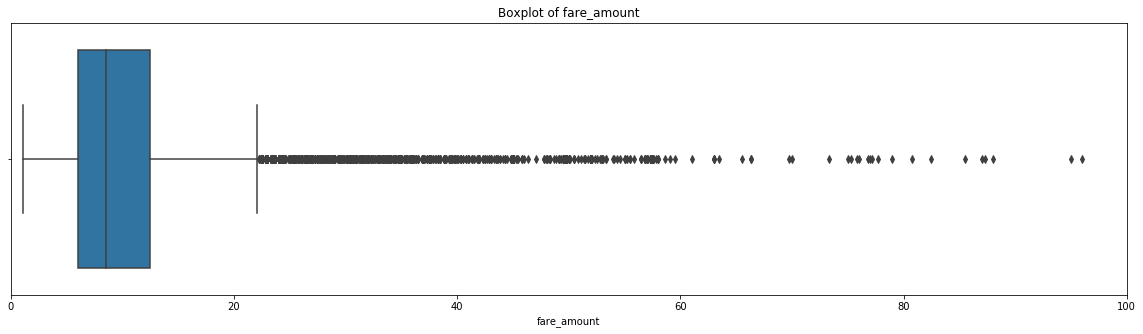

In [91]:
#1.fare_amount variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],data=train,orient='h')
plt.title('Boxplot of fare_amount')

plt.show()

In [92]:
sum(train['fare_amount']<22.5)/len(train['fare_amount'])*100

91.34793435923632

In [93]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(train[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    train.loc[train[col] < minimum,col] = np.nan
    train.loc[train[col] > maximum,col] = np.nan

In [94]:
outlier_treatment('fare_amount')

12.5 6.0
-3.75 22.25


In [95]:
train = train.drop('pickup_datetime', axis =1)

In [96]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,1358
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [97]:
train.std()

fare_amount          4.139605
pickup_longitude     2.659050
pickup_latitude      2.613305
dropoff_longitude    2.710835
dropoff_latitude     2.632400
passenger_count      1.264435
dtype: float64

In [98]:
#imputation of missing values by median
train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount'].median())

In [99]:
train['passenger_count'].describe()

count     15661
unique        6
top           1
freq      11071
Name: passenger_count, dtype: int64

In [100]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [101]:
#make a copy
df2 = train.copy()

In [102]:
train.shape

(15661, 6)

In [103]:
############################ 4.feature engineering #############

In [104]:
#1. pickup_datetime variable

In [105]:
# we will Join 2 Dataframes pickup_datetime and train
train = pd.merge(pickup_datetime,train,right_index=True,left_index=True)

In [106]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [107]:
train=train.reset_index(drop=True)

In [108]:
train

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
15656,2014-12-12 07:41:00+00:00,6.5,-74.008820,40.718757,-73.998865,40.719987,1
15657,2009-07-13 07:58:00+00:00,16.1,-73.981310,40.781695,-74.014392,40.715527,2
15658,2009-11-11 11:19:07+00:00,8.5,-73.972507,40.753417,-73.979577,40.765495,1
15659,2010-05-11 23:53:00+00:00,8.1,-73.957027,40.765945,-73.981983,40.779560,1


In [109]:
#checking for pickup_datetime missing values
pd.DataFrame(train.isna().sum())

,0
pickup_datetime,1
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [110]:
train=train.dropna()

In [111]:
data = [train,test]
for i in data:
    #year
    i["year"] = i["pickup_datetime"].apply(lambda row: row.year)
    
    #month
    i["month"] = i["pickup_datetime"].apply(lambda row: row.month)
   
    #day od week
    i["day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    
    #hour
    i["hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [112]:
#make a copy
train_nodummies=train.copy()

In [113]:
train.shape

(15660, 11)

In [114]:
test.shape

(9914, 10)

In [115]:
# 3.to calculate the distance travelled using longitude and latitude using from geopy library(couldn't be done using haversine)

In [116]:
from geopy.distance import geodesic
from geopy.distance import great_circle

In [117]:
data = [train, test]
for i in data:
    i['great_circle']=i.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).km, axis=1)
    i['geodesic']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).km, axis=1)

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [118]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,great_circle,geodesic
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,1.030765,1.029601
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,8.450146,8.443441
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,1.389527,1.389132
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,2.799274,2.795790
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,1.999160,1.998338


In [119]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,great_circle,geodesic
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,2.323263,2.320991
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,2.425356,2.423802
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,0.618629,0.618182
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,1.961035,1.959671
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,5.387309,5.382833


In [120]:
pd.DataFrame(train.isna().sum())

,0
pickup_datetime,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
month,0
day_of_week,0


In [121]:
pd.DataFrame(test.isna().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
month,0
day_of_week,0
hour,0


In [122]:
#We will remove the variables which were used to feature engineer new variables

In [123]:
train=train.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'great_circle'],axis=1)
test=test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'great_circle'],axis=1)

In [124]:
train.shape,test.shape

((15660, 7), (9914, 6))

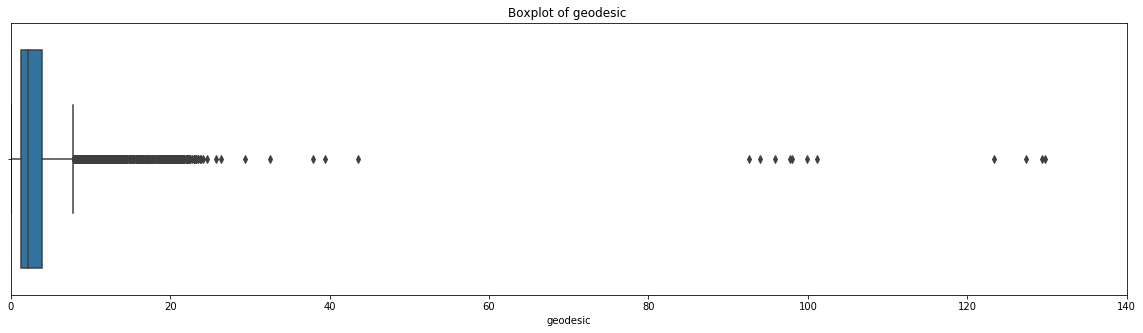

In [125]:
#check for outliers
plt.figure(figsize=(20,5)) 
plt.xlim(0,140)
sns.boxplot(x=train['geodesic'],data=train,orient='h')
plt.title('Boxplot of geodesic ')
plt.show()

In [126]:
outlier_treatment('geodesic')

3.9037343222038094 1.25773685240001
-2.711259352305689 7.872730526909509


In [127]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
passenger_count,0
year,0
month,0
day_of_week,0
hour,0
geodesic,1348


In [128]:
#Imputing with missing values using median
train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount'].median())

In [129]:
######################### 5.feature selection ##########################

In [130]:
cat_var=['passenger_count', 'month', 'day_of_week', 'hour', 'year']

num_var=['fare_amount','geodesic']

In [131]:
train[cat_var]=train[cat_var].apply(lambda x: x.astype('category') )
test[cat_var]=test[cat_var].apply(lambda x: x.astype('category') ) 

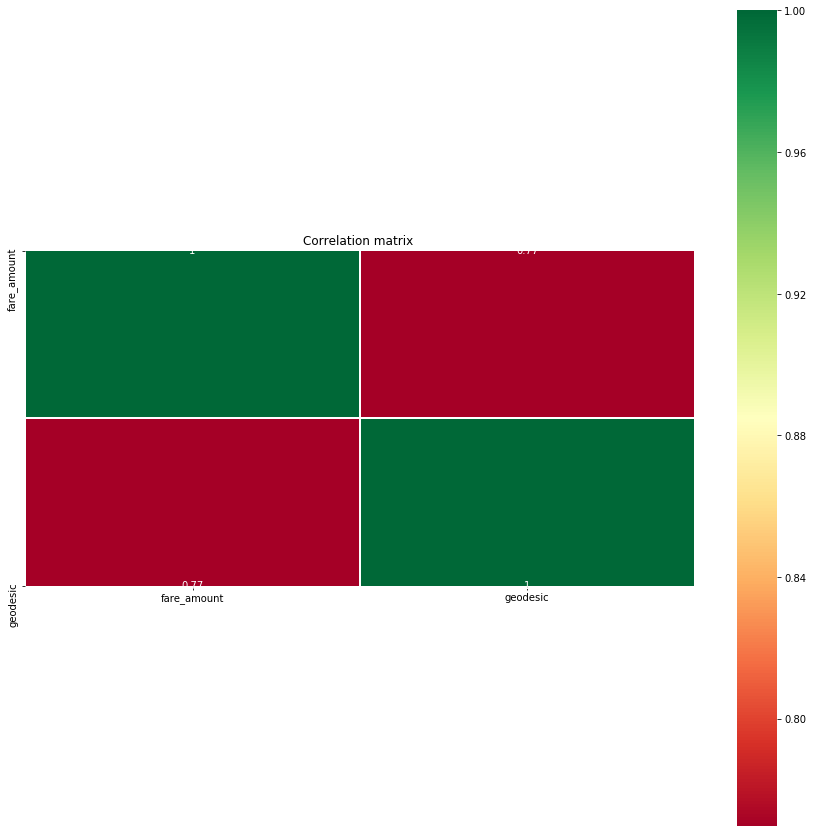

In [132]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(train[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

C:\Users\nikhi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


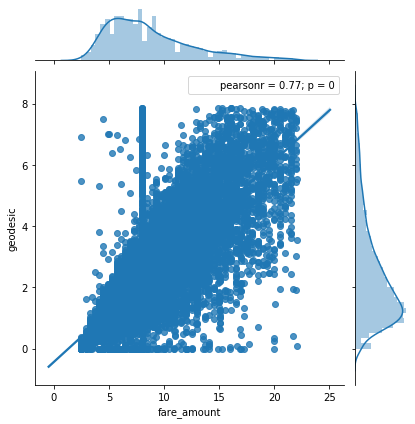

In [133]:
_ = sns.jointplot(x='fare_amount',y='geodesic',data=train,kind = 'reg')
_.annotate(stats.pearsonr)

plt.show()

In [134]:
#we cannot carryout chi-square test as target variable (fare_amount) is continous in nature

In [135]:
#ANOVA for categorical variables

In [136]:
model = ols('fare_amount ~ C(passenger_count)+C(month)+C(day_of_week)+C(hour)+C(year)',data=train).fit()

In [137]:
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count),5.0,323.534241,64.706848,4.230212,7.625833e-04
C(month),11.0,569.066564,51.733324,3.382068,1.079462e-04
C(day_of_week),6.0,113.379786,18.896631,1.235368,2.844700e-01
C(hour),23.0,1734.576676,75.416377,4.930348,7.231387e-14
C(year),6.0,4649.967830,774.994638,50.665298,4.735782e-62
Residual,15608.0,238745.587002,15.296360,NaN,NaN


In [138]:
#Every variable has p-value less than 0.05 therefore we reject the null hypothesis.

In [139]:
#Multicollinearity Test

In [140]:
outcome, predictors = dmatrices('fare_amount ~ geodesic+passenger_count+month+day_of_week+hour+year',train, return_type='dataframe')

In [141]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,54.583644,Intercept
1,1.044675,passenger_count[T.2]
2,1.022852,passenger_count[T.3]
3,1.015111,passenger_count[T.4]
4,1.027992,passenger_count[T.5]
5,1.019743,passenger_count[T.6]
6,1.740582,month[T.2]
7,1.830469,month[T.3]
8,1.786871,month[T.4]
9,1.834627,month[T.5]


In [142]:
##########################  6.feature scaling ##################

In [143]:
train[num_var].var()

fare_amount    15.718508
geodesic        2.793330
dtype: float64

C:\Users\nikhi\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nikhi\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


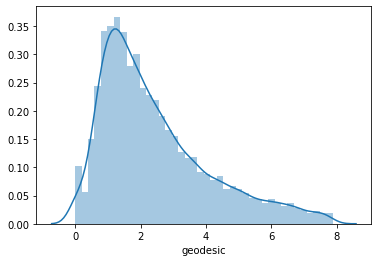

In [144]:
#Normality check
sns.distplot(train['geodesic'],bins=40)

In [145]:
#Normalization
train['geodesic'] = (train['geodesic'] - min(train['geodesic']))/(max(train['geodesic']) - min(train['geodesic']))
test['geodesic'] = (test['geodesic'] - min(test['geodesic']))/(max(test['geodesic']) - min(test['geodesic']))

In [146]:
train['geodesic'].var()

0.04512619929879313

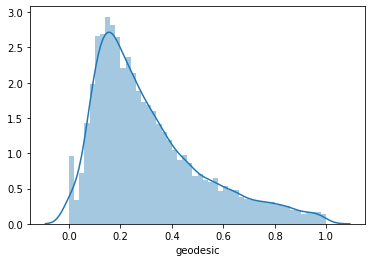

In [147]:
sns.distplot(train['geodesic'],bins=50)

In [148]:
train.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day_of_week',
       'hour', 'geodesic'],
      dtype='object')

In [149]:
#make a copy
df4=train.copy()

f4=test.copy()

In [150]:
################## machine learning algorithm ################

In [151]:
X = train.drop('fare_amount',axis=1).values
y = train['fare_amount'].values

In [152]:
#splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42) 

In [ ]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print('RMSLE:',rmsle(y_train,y_pred))
    print()
    print('<<<------------------- Test Data Score --------------------->')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    scores(y_test,y_pred)
    print('RMSLE:',rmsle(y_test,y_pred))

In [ ]:
############### linear regression ###########

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

In [ ]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_scores(reg_all)

# Compute and print the coefficients
reg_coef = reg_all.coef_
print(reg_coef)

In [ ]:
#################### 2. decision tree ###############################

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
# Instantiate a tree regressor: tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=2)

# Fit the regressor to the data
tree.fit(X_train,y_train)

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Sort test importances in descending order
indices = np.argsort(tree_features)[::1]

# Rearrange test names so they match the sorted test importances
names = [test.columns[i] for i in indices]

# Make predictions and cal error
test_scores(tree)

In [ ]:
############################ 3. random forest #####################

In [ ]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

In [ ]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=9, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]